In [1]:
import PyDSTool as dst
import numpy as np
import scipy as sp
#from PyDSTool import args
#from PyDSTool import Generator
import matplotlib.pyplot as plt

First attempt at creating a model using PyDsTool, 
starting with the simplest SIR Model:

\begin{equation}
\frac{dS}{dt} =
-\beta \frac{S}{N} I
\end{equation}

\begin{equation}
\frac{dI}{dt} =
\beta \frac{S}{N} I
-\alpha I
\end{equation}

\begin{equation}
\frac{dR}{dt} =
\alpha I
\end{equation}

$\beta$ = Infection rate
$\alpha$ = Recovery rate


In [2]:
# setting up initial conditions, parameters and variables
icdict = {'s': 1000000, 'i': 10, 'r':0}
pardict = {'beta': 0.5,'alpha': 5, 'N': 1000000}

# defining RHS of differential equations of the system
ds_rhs = '-beta * (s/N) * i'
di_rhs = 'beta * (s/N) * i - (1/alpha) * i'
dr_rhs = '(1/alpha) * i'

vardict = {'s': ds_rhs, 'i': di_rhs, 'r': dr_rhs} # tells DSTool that there are 3 dynamic state var's, specified by the eqns in the strings dS/dI/dR_rhs

DSargs = dst.args()
DSargs.name = 'SIR' # name the model
DSargs.ics = icdict # set initial condn's
DSargs.pars = pardict # set parameters
DSargs.tdata = [0, 20] # how long we expect to integrate for
DSargs.varspecs = vardict

#Generator
ode = dst.Generator.Vode_ODEsystem(DSargs)

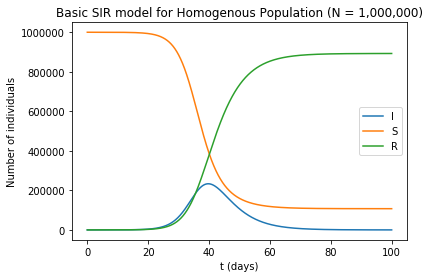

In [13]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
ode.set(pars={'alpha': 5, 'beta':0.5, 'N': 1000000},
        ics={'i': 10, 's': 1000000, 'r': 0},
        tdata=[0,100])

# getting points for plotting 
traj = ode.compute('test')
pts = traj.sample()

# creating plot
plt.plot(pts['t'], pts['i'], label='I')
plt.plot(pts['t'], pts['s'], label='S')
plt.plot(pts['t'], pts['r'], label='R')
plt.legend()
plt.xlabel('t (days)')
plt.ylabel('Number of individuals')
plt.title('Basic SIR model for Homogenous Population (N = 1,000,000)')
plt.savefig('Basic SIR model', bbox_inches='tight')

In [4]:
pts

Pointset <no name> (parameterized)
Independent variable:
t:  [0.         0.01001001, ...,  9.98998999 10.        ]
Coordinates:
i:  [1.         1.04085113, ..., 0.37506699 0.37146057]
r:  [0.         0.01021311, ..., 993.67033085 993.6740672 ]
s:  [1000.          999.94893576, ..., 6.95460216 6.95447223]
Labels by index: Empty

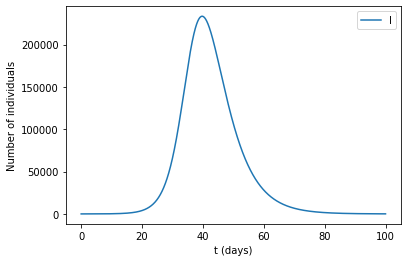

In [3]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
ode.set(pars={'alpha': 5, 'beta':0.5, 'N': 1000000},
        ics={'i': 10, 's': 1000000, 'r': 0},
        tdata=[0,100])

# getting points for plotting 
traj = ode.compute('test')
pts = traj.sample()

# creating plot
plt.plot(pts['t'], pts['i'], label='I')
plt.legend()
plt.xlabel('t (days)')
plt.ylabel('Number of individuals')
plt.savefig('Simple I Trajectory', bbox_inches='tight')

# SIR with Vaccination and 2nd Variant

Situation starts at $t_0 = 0$ with one variant for which a vaccine is available and vaccinations are underway at a fixed rate.

A second variant is introducced to the population at a later time $t_1$

### Compartments

- S, In-fluxes: None | Out-fluxes: - infections and - vaccinations
- I, In-fluxes: + Infections | Out-fluxes: - recoveries
- R, In-fluxes: + recoveries | Out-fluxes: none
- V, In-fluxes: + vaccinations | Out-fluxes: none


### Equations

\begin{equation}
\frac{dS}{dt} =
-\beta_1 S \frac{I_1}{N} - \beta_2 S \frac{I_2}{N}  -\rho 
\end{equation}

\begin{equation}
\frac{dI_1}{dt} =
\beta_1 S \frac{I_1}{N} 
-\alpha I_1
\end{equation}

\begin{equation}
\frac{dI_2}{dt} =
\beta_2 S \frac{I_2}{N} +
\beta_2 V \frac{I_2}{N} 
-\alpha I_2
\end{equation}

\begin{equation}
\frac{dR}{dt} =
\alpha \left( I_1 + I_2 \right)
\end{equation}

\begin{equation}
\frac{dV}{dt} =
\rho - \beta_2 V \frac{I_2}{N}
\end{equation}

$\beta_1$ = Strain 1 Infection rate ,
$\beta_2$ = Strain 2 Infection rate ,
$\alpha$ = Recovery rate,
$\rho$ = Vaccination rate

In [6]:
# setting up initial conditions, parameters and variables
icdict = {'s': 1, 'i1': 1, 'i2':1, 'r':0, 'v': 0}
pardict = {'beta1': 0.1, 'beta2': 0.2, 'alpha': 0.2, 'N': 5000000, 'rho': 100}

# defining RHS of differential equations of the system
ds_rhs = '- (beta1 * s * (i1/N)) - (beta2 * s * (i2/N)) - rho'
di1_rhs = '(beta1 * s * (i1/N)) - (alpha * i1)'
di2_rhs = '(beta2 * s * (i2/N)) + (beta2 * v * (i2/N)) - (alpha * i2)'
dr_rhs = 'alpha * (i1 +i2)'
dv_rhs = 'rho - (beta2 * v * (i2/N))'

vardict = {'s': ds_rhs, 'i1': di1_rhs, 'i2': di2_rhs, 'r': dr_rhs, 'v': dv_rhs} # tells DSTool that there are 5 dynamic state var's, specified by the eqns in the strings dS/dI/dR_rhs

DSargs = dst.args()
DSargs.name = 'SIRV' # name the model
DSargs.ics = icdict # set initial condn's
DSargs.pars = pardict # set parameters
DSargs.tdata = [0, 20] # how long we expect to integrate for
DSargs.varspecs = vardict

#Generator
SIRV = dst.Generator.Vode_ODEsystem(DSargs)

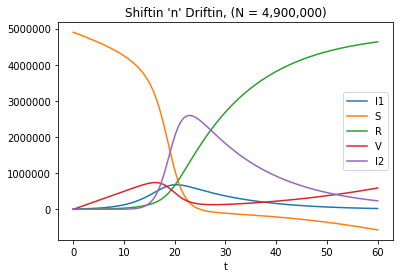

In [57]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SIRV.set(pars={'alpha': 1/14, 'beta1': 0.37, 'beta2': 0.9, 'N': 4900000, 'rho': 50000},
        ics={'i1': 7906, 'i2': 1, 's': 4900000, 'r': 0, 'v': 0},
        tdata=[0,60])

# getting points for plotting 
traj_SIRV = SIRV.compute('test')
pts_SIRV = traj_SIRV.sample()

# creating plot
plt.plot(pts_SIRV['t'], pts_SIRV['i1'], label='I1')
plt.plot(pts_SIRV['t'], pts_SIRV['s'], label='S')
plt.plot(pts_SIRV['t'], pts_SIRV['r'], label='R')
plt.plot(pts_SIRV['t'], pts_SIRV['v'], label='V')
plt.plot(pts_SIRV['t'], pts_SIRV['i2'], label='I2')
plt.legend()
plt.xlabel('t')
plt.title('Shiftin \'n\' Driftin, (N = 4,900,000)')
plt.show()

### Plotting I1 for. multiple values of $\beta_1$

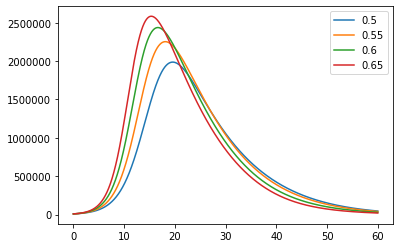

In [64]:
                                  # Sequences of plot commands will not clear the existing figure
for param in [0.5, 0.55, 0.6, 0.65, ]:
    SIRV.set( pars = { 'beta1': param } )                # Initial condition
    # Trajectories are called testa, testb, ...
    # sample them on the fly to create Pointset tmp
    tmp = SIRV.compute('test').sample()  
    plt.plot(tmp['t'], tmp['i1'], label=param)
plt.legend()
plt.show()

### Attempt at Simulating Irish Situation with UK Variant

Temporary work-around is to run the model starting from the first day the UK variant was introduced to the Republic of Ireland (around Dec 25th 2020).  